In [22]:
import numpy as np
import matplotlib.pyplot as plt
import time
from ADI import ADI2D
from MatrixThomas import MatrixThomas2D
from Relaxation import Relaxation2D

Problem Formulation

In [23]:
x_deriv2 = {
    'Func': lambda x, y: np.full_like(x, 3),
    'bounds': (0, 1),
    'bound_cond': [(0, 1, lambda y: np.full_like(y, -1)), # left
                   (1, 0, lambda y: np.full_like(y, 2))], # right
    'points_num': 100
}

y_deriv2 = {
    'Func': lambda x, y: np.full_like(x, 1),
    'bounds': (-1, 2),
    'bound_cond': [(0, 1, lambda x: np.full_like(x, 2)), # top
                   (0, 1, lambda x: np.full_like(x, 1))], # bottom
    'points_num': 100
}

S = lambda x, y: np.full_like(x, -3)

f = lambda x, y: np.exp(x**2 + 2 * y**2 - 3)

inner_cond_1 = {
    'bounds': [(1/3, 1/2), (-1/3, 3/2)],
    'u_value': 10
}
inner_conds = [inner_cond_1]

Exact solution by Matrix Thomas method

In [24]:
matrix_thomas = MatrixThomas2D(x_deriv2, y_deriv2, S, f, inner_conds)
work_time = time.time()
U_matrix = matrix_thomas.solve()
work_time = time.time() - work_time

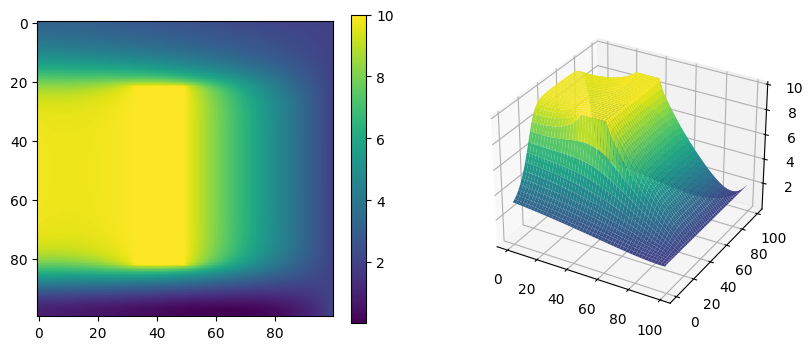

In [25]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(U_matrix, cmap='viridis')
plt.colorbar()

plt.subplot(1, 2, 2, projection='3d')
x = np.linspace(0, U_matrix.shape[1] - 1, U_matrix.shape[1])
y = np.linspace(0, U_matrix.shape[0] - 1, U_matrix.shape[0])
x, y = np.meshgrid(x, y)
surf = plt.gca().plot_surface(x, y, U_matrix, cmap='viridis')

plt.subplots_adjust(wspace=0.1)
plt.show()

Speed comparison

In [26]:
adi = ADI2D(x_deriv2, y_deriv2, S, f, inner_conds)
U_adi = adi.solve(max_iter_num=20000, criterion=1e-7)

In [27]:
relaxation = Relaxation2D(x_deriv2, y_deriv2, S, f, inner_conds)
U_relax = relaxation.solve(max_iter_num=20000, criterion=1e-7)

In [28]:
print("MAE(MatrixThomas, ADI) =", np.mean(np.abs(U_matrix - U_adi)))
print("MAE(MatrixThomas, Relaxation) =", np.mean(np.abs(U_matrix - U_relax)))

MAE(MatrixThomas, ADI) = 0.0008356874736887108
MAE(MatrixThomas, Relaxation) = 0.00016876422808353124


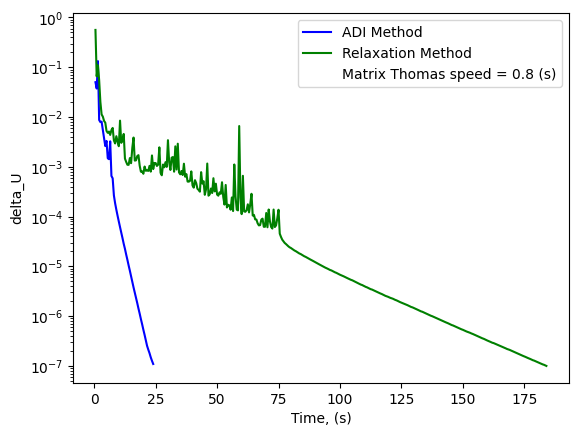

In [29]:
adi_error = adi.history
time_steps_adi = np.arange(0.5, 0.5 + len(adi_error) * 0.5, 0.5)

relax_error = relaxation.history
time_steps_relax = np.arange(0.5, 0.5 + len(relax_error) * 0.5, 0.5)

plt.yscale('log')

plt.plot(time_steps_adi, adi_error, label='ADI Method', color='blue')
plt.plot(time_steps_relax, relax_error, label='Relaxation Method', color='green')

plt.xlabel('Time, (s)')
plt.ylabel('delta_U')
plt.plot([], [], ' ', label=f"Matrix Thomas speed = {round(work_time, 2)} (s)")
plt.legend(loc='upper right')

plt.show()